In this lecture, we will continue to study the the library 'seaborn'. The 'seaborn' package's official documentation is listed here: http://seaborn.pydata.org/. 

We will focus on building more specialized visualizations such as matrix plot and regression plots. 

We start our journey with matrix plots. Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data. This will be particularly useful when we are dealing with clustering algorithms and other segmentation models. The focus here is the 'heapmap' and 'clustermap' in 'seaborn'.

In [1]:
import seaborn as sns
%matplotlib inline

We will use two datasets 'flights' and 'tips' for our examples throughout this lecture. We have seen the 'tips' dataset previously so we won't elaborate here. The 'flights' dataset records the number of flight passengers that fly in a given month and a given year:

In [2]:
flights = sns.load_dataset('flights')
tips = sns.load_dataset('tips')
for j in [flights, tips]:
    print(j.head())
    print('\n')

   year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4




We first go over the heatmaps. In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap() function basically just colors it in for you. By matrix form, we mean the mathematical matrix form (an example would be a correlation matrix). A normal 'DataFrame' object will not be handled appropriately through the sns.heatmap() function, as the index name and the column name does not exactly match up for that cell value. We use our example below to illustrate this point. The dataset we will be using is the 'tips' dataset. 

correlation matrix:             total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000
correlation matrix:  <class 'pandas.core.frame.DataFrame'> 

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, total_bill to size
Data columns (total 3 columns):
total_bill    3 non-null float64
tip           3 non-null float64
size          3 non-null float64
dtypes: float64(3)
memory usage: 96.0+ bytes
None


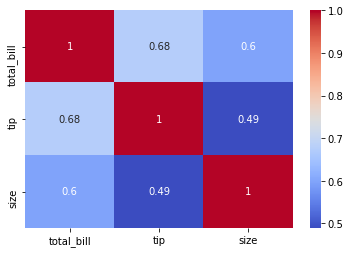

In [3]:
correlation=tips.corr() # creating a correlation matrix
print('correlation matrix:', correlation)
print('correlation matrix: ', type(correlation), '\n')
proc_content=correlation.info()
print(proc_content)
sns.heatmap(correlation, annot=True, cmap='coolwarm') # also adding the annotation here

In the example above, we create a correlation matrix as a 'DataFrame' object. Since the correlation matrix has rows and columns that correspond their cells in a meaningful way, the heat map generated basically tells us a legitimate story by color. 

Let's have another example, but this time using pivot tables:

<class 'pandas.core.frame.DataFrame'>
year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
February    118   126   150   180   196   188   233   277   301   318   342   
March       132   141   178   193   236   235   267   317   356   362   406   
April       129   135   163   181   235   227   269   313   348   348   396   
May         121   125   172   183   229   234   270   318   355   363   420   
June        135   149   178   218   243   264   315   374   422   435   472   
July        148   170   199   230   264   302   364   413   465   491   548   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   
October     119   133   162   191   211   229   274   306   347   359   407   
November    10

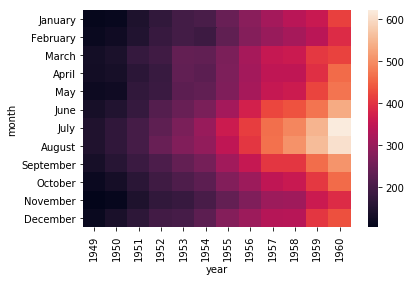

In [4]:
pivot=flights.pivot_table(values='passengers',index='month',columns='year')
print(type(pivot))
print(pivot)
sns.heatmap(pivot)

Of course, there are styles and visual enhancements available for heatmaps:

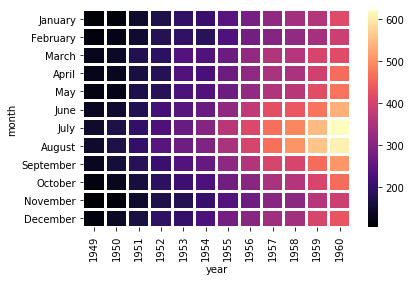

In [5]:
sns.heatmap(pivot,cmap='magma', linecolor='white', linewidths=2)

Now let's introduce cluster maps. Cluster maps essentilly use hierarchal clustering to produce a clustered version of the heatmap. Obviously, this is often used in hierarchal clustering tasks for unsupervised learning, which can be agglomerative or divisive in algorithm. Below is an example of a visualization for hierarchcal clustering:

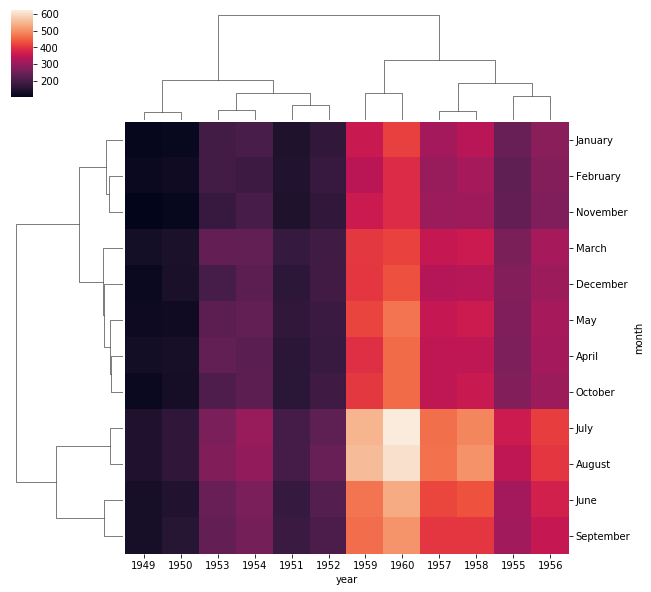

In [6]:
sns.clustermap(pivot)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (this makes sense, since they are both summer travel months).

We can also use the optional argument 'standard_scale' to standardize the scales (so everything is between 0 and 1). From the picture below, we see that February, January, and November seem to be in one cluster. March, October, December, April and May seem to be in one cluster. July and August clearly form a cluster. Lastly, June and September seem to form a cluster. 

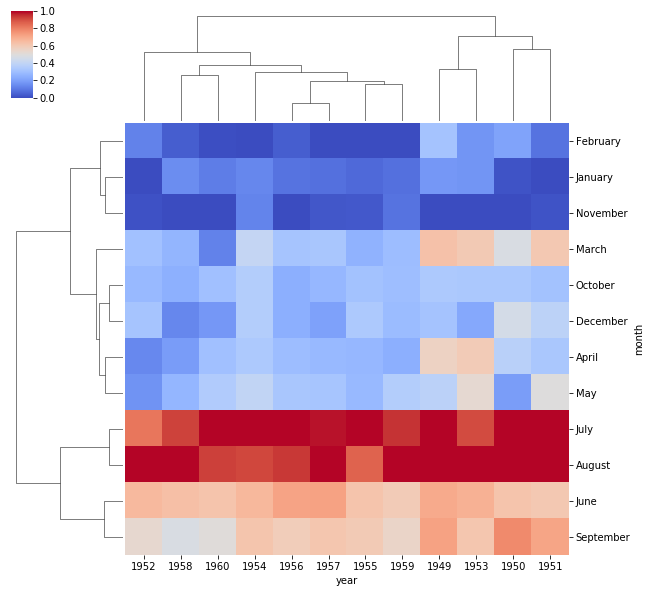

In [6]:
sns.clustermap(pivot, cmap='coolwarm', standard_scale=True)

Next we study regression plots, which are of course used in regression analysis. The main function we will be using is the implot() function (stands for 'linear model plot'), which allows you to mainly display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

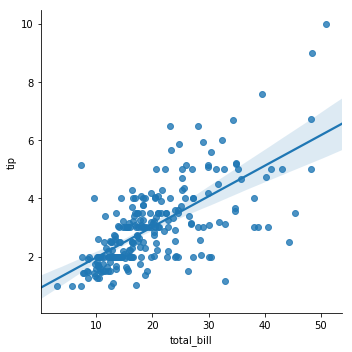

In [12]:
sns.lmplot(x='total_bill',y='tip',data=tips)

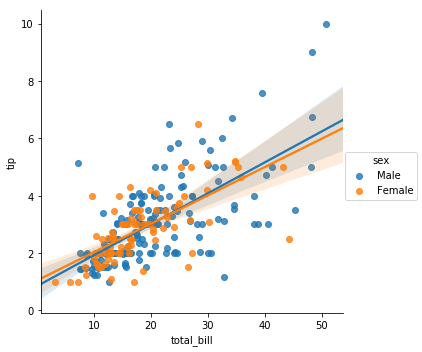

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

We can also use the 'markers' argument  for emphasis on a linear regression line with scatter size. Notice that the 'scatter_kws' argument needs to be specified so that a dictionary is taken as the input:

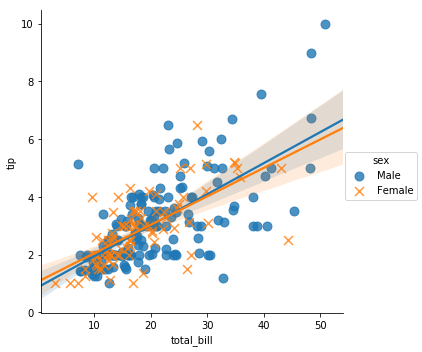

In [14]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','x'], scatter_kws={'s':80})

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the 'col' or 'row' arguments. For example, below is an example that separates two groups by column:

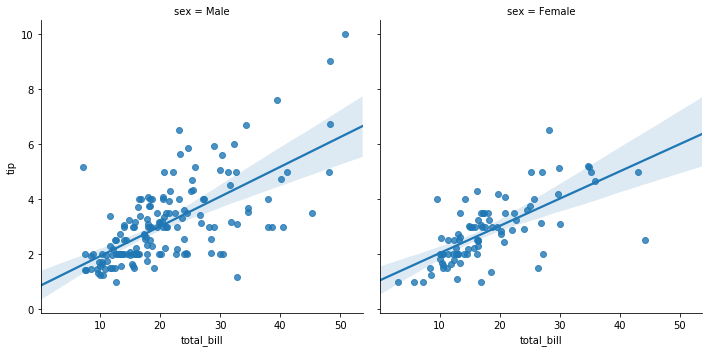

In [15]:
sns.lmplot(x='total_bill',y='tip',data=tips, col='sex')

Here is an another example using both rows and columns:

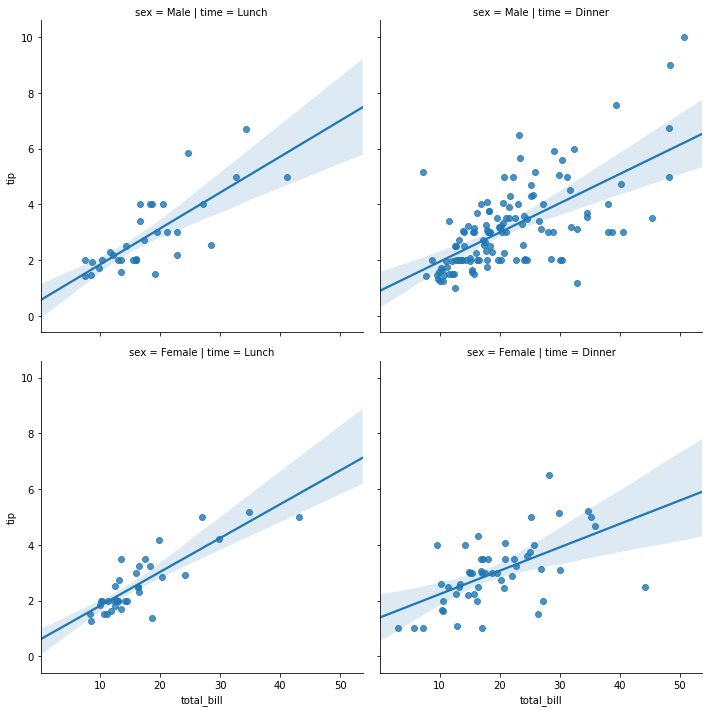

In [16]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)

We can also change the 'aspect' and 'size' arguments to control how each picture fits in the big frame visually. The 'aspect' argument controls the aspect ratio of each facet (default is 1, so the width and the height equals each other). Smaller 'aspect' yields 'thinner' pictures. On the other hand, 'size' controls the height:

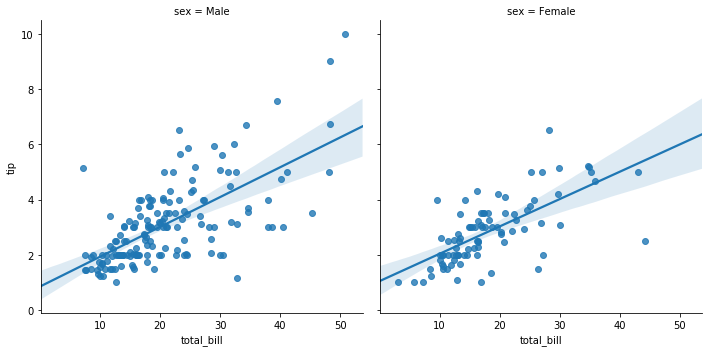

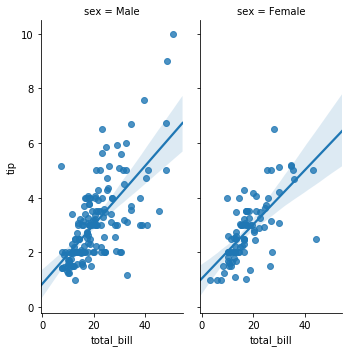

In [17]:
g1=sns.lmplot(x='total_bill',y='tip',data=tips, col='sex', aspect=1)
g2=sns.lmplot(x='total_bill',y='tip',data=tips, col='sex', aspect=0.5)
print(g1)
print(g2)